<font color=red><p style="font-size:32px;text-align:center"><b>BBC News Classification</b></p></font>

**<font color=blue>Description</font>**
- Text documents are one of the richest sources of data for businesses.
- In this problem, uses a public dataset from the BBC comprised of 2225 articles, each labeled under one of 5 categories: business, entertainment, politics, sport or tech.
- The dataset is broken into 1490 records for training and 735 for testing. 
- <font color=green>The goal will be to build a system that can accurately classify previously unseen news articles into the right category.</font>

**<font color=blue>File Descriptions</font>**
- BBC News Train.csv - training set of 1490 records
- BBC News Test.csv - test set of 736 records

<font color=gren>Download the dataset from <a href="https://www.kaggle.com/c/learn-ai-bbc/data">Kaggle</a></font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load_given_train_datasets
#kaggle_dataset_: https://www.kaggle.com/c/learn-ai-bbc/
train_data = pd.read_csv("D:/Case Studies/BBC News/BBC News Train.csv")

In [3]:
train_data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [4]:
print("NUMBER OF DATA POINTS -",train_data.shape[0])
print("NUMBER OF FEATURES -",train_data.shape[1])
print("FEATURES -",train_data.columns.values)

NUMBER OF DATA POINTS - 1490
NUMBER OF FEATURES - 3
FEATURES - ['ArticleId' 'Text' 'Category']


**<font color=blue>Data Fields</font>**

- **ArticleId** - Article id unique # given to the record
- **Article** - Text of the header and article
- **Category** - Cateogry of the article (tech, business, sport, entertainment, politics)

In [5]:
train_data['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [6]:
#checking_null_values
train_data.isna().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

**<font color=blue>Categories</font>**

In [7]:
target_category = train_data['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


**<font color=blue>Distribution of Datapoints Per Category</font>**

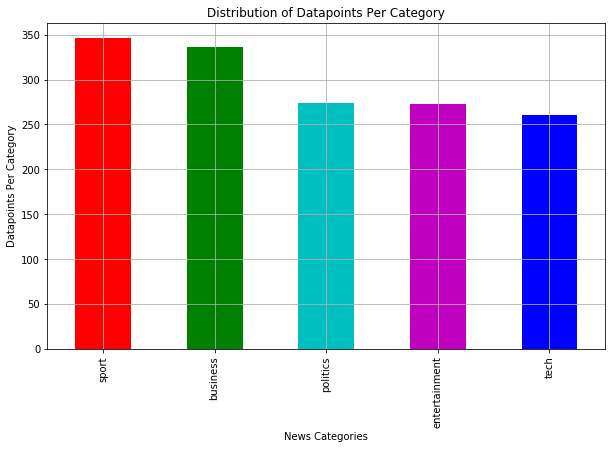

In [8]:
news_cat = train_data['Category'].value_counts()

plt.figure(figsize=(10,6))
my_colors = ['r','g','c','m','b']
news_cat.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("News Categories")
plt.ylabel("Datapoints Per Category")
plt.title("Distribution of Datapoints Per Category")
plt.show()

**<font color=blue>Data Preprocessing</font>**

In [9]:
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
import nltk
import re

#loading_the_stop_words_from_nltk_library_
stop_words = set(stopwords.words('english'))

def txt_preprocessing(total_text, index, column, df):
    if type(total_text) is not int:
        string = ""
        
        #replace_every_special_char_with_space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        
        #replace_multiple_spaces_with_single_space
        total_text = re.sub('\s+',' ', total_text)
        
        #converting_all_the_chars_into_lower_case
        total_text = total_text.lower()
        
        for word in total_text.split():
        #if_the_word_is_a_not_a_stop_word_then_retain_that_word_from_the_data
            if not word in stop_words:
                string += word + " "
        
        df[column][index] = string

In [10]:
#train_data_text_processing_stage_
for index, row in train_data.iterrows():
    if type(row['Text']) is str:
        txt_preprocessing(row['Text'], index, 'Text', train_data)
    else:
        print("THERE IS NO TEXT DESCRIPTION FOR ID :",index)

train_data.head()

,ArticleId,Text,Category
0,1833,worldcom ex boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens maj...,business
3,1976,lifestyle governs mobile choice faster better ...,tech
4,917,enron bosses 168m payout eighteen former enron...,business


**<font color=blue>Train-Test Split</font>**

In [11]:
from sklearn.model_selection import train_test_split
X_train = train_data
y_train = train_data['Category']

X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train, random_state=0)

In [12]:
print("NUMBER OF DATA POINTS IN TRAIN DATA :", X_train.shape[0])
print("NUMBER OF DATA POINTS IN CROSS VALIDATION DATA :", X_cv.shape[0])

NUMBER OF DATA POINTS IN TRAIN DATA : 1192
NUMBER OF DATA POINTS IN CROSS VALIDATION DATA : 298


**<font color=blue>Distribution of Target Varibles in Train and CV Datasets</font>**

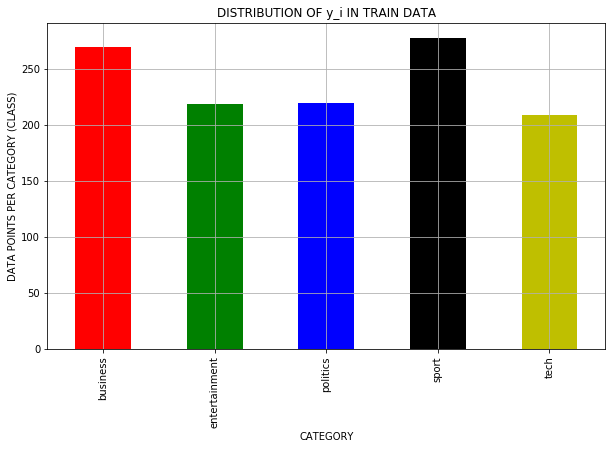

NUMBER OF DATA POINTS IN CLASS 4 : 277 ( 23.238 %)
NUMBER OF DATA POINTS IN CLASS 1 : 269 ( 22.567 %)
NUMBER OF DATA POINTS IN CLASS 3 : 219 ( 18.372 %)
NUMBER OF DATA POINTS IN CLASS 2 : 218 ( 18.289 %)
NUMBER OF DATA POINTS IN CLASS 5 : 209 ( 17.534 %)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.


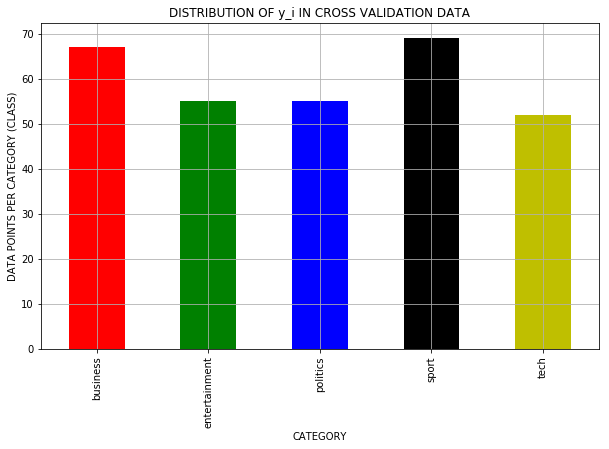

NUMBER OF DATA POINTS IN CLASS 4 : 69 ( 23.154 %)
NUMBER OF DATA POINTS IN CLASS 1 : 67 ( 22.483 %)
NUMBER OF DATA POINTS IN CLASS 2 : 55 ( 18.456 %)
NUMBER OF DATA POINTS IN CLASS 3 : 55 ( 18.456 %)
NUMBER OF DATA POINTS IN CLASS 5 : 52 ( 17.45 %)


In [13]:
#this_returns_a_dict_keys_as_class_labels_and_values_as_the_number_of_data_points_in_that_class

import numpy as np
train_class_distribution = X_train['Category'].value_counts().sort_index()
cv_class_distribution = X_cv['Category'].value_counts().sort_index()

#distribution_of y_i's_in_train_data
plt.figure(figsize=(10,6))
my_colors = ['r', 'g', 'b', 'k', 'y']
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('CATEGORY')
plt.ylabel('DATA POINTS PER CATEGORY (CLASS)')
plt.title('DISTRIBUTION OF y_i IN TRAIN DATA')
plt.grid()
plt.show()

#-(train_class_distribution.values):_the_minus_sign_will_returns_in_decreasing_order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('NUMBER OF DATA POINTS IN CLASS', i+1, ':',train_class_distribution.values[i],'(',np.round((train_class_distribution.values[i]/X_train.shape[0]*100), 3),'%)')

print("-."*50)
#distribution_of y_i's_in_cv_data
plt.figure(figsize=(10,6))
my_colors = ['r', 'g', 'b', 'k', 'y']
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('CATEGORY')
plt.ylabel('DATA POINTS PER CATEGORY (CLASS)')
plt.title('DISTRIBUTION OF y_i IN CROSS VALIDATION DATA')
plt.grid()
plt.show()

sorted_yi = np.argsort(-cv_class_distribution.values)
for i in sorted_yi:
    print('NUMBER OF DATA POINTS IN CLASS', i+1, ':',cv_class_distribution.values[i],'(',np.round((cv_class_distribution.values[i]/X_cv.shape[0]*100), 3),'%)')

**<font color=blue>One Hot Encoding of Text Data (BoW)</font>**

In [14]:
#building a CountVectorizer with all the words that occured minimum 3 times in train data
from sklearn.feature_extraction.text import CountVectorizer

text_vectorizer = CountVectorizer(min_df=3)
train_text_ohe = text_vectorizer.fit_transform(X_train['Text'])

#getting all the feature names (words)
train_text_features = text_vectorizer.get_feature_names()

#train_text_ohe.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_ohe.sum(axis=0).A1

#zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))

print("Total Number of Unique Words in Train Data :",len(train_text_features))

Total Number of Unique Words in Train Data : 9212


In [15]:
from sklearn.preprocessing import normalize #normalize every feature

train_text_ohe = normalize(train_text_ohe, axis=0)

#we use the same vectorizer that was trained on train data
cv_text_ohe = text_vectorizer.transform(X_cv['Text'])

#don't forget to normalize every feature
cv_text_ohe = normalize(cv_text_ohe, axis=0)

**<font color=blue>Q. Is the text feature stable across Train and CV datasets ?</font>**

In [16]:
#to check text feature i.e., title stable across all the data sets (Train, Cross Validation)
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['Text'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [17]:
len1,len2 = get_intersec_text(X_cv)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data.")

96.767 % of word of Cross Validation appeared in train data.


**<font color=blue>Confusion Matrix</font>**

In [18]:
#this_function_plots_the_confusion_matrices_given_y_i_and_y_i_hat_
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(test_y, predict_y):

    C = confusion_matrix(test_y, predict_y) #confusion_mat
    A =(((C.T)/(C.sum(axis=1))).T) #recall_mat
    B =(C/C.sum(axis=0)) #precision_mat
    
    labels = [1,2,3,4,5,6]
    
    #representing_C_in_heatmap_format
    print("-"*40, "Confusion Matrix", "-"*40)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #representing_B_in_heatmap_format
    print("-"*40, "Precision Matrix (Columm Sum=1)", "-"*40)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #representing_A_in_heatmap_format
    print("-"*40, "Recall Matrix (Row Sum=1)", "-"*40)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

**<h2><font color=red>1.</font><font color=green> Multinomial Naive Bayes</font></h2>**

For Alpha = 1e-05
Log Loss : 0.23528739091164588
For Alpha = 0.0001
Log Loss : 0.22353843629634212
For Alpha = 0.001
Log Loss : 0.21603725987243735
For Alpha = 0.1
Log Loss : 0.19649943168883263
For Alpha = 1
Log Loss : 0.17747519121011954
For Alpha = 10
Log Loss : 0.15684924972198958
For Alpha = 100
Log Loss : 0.2023646738475747
For Alpha = 1000
Log Loss : 0.2167496939856374


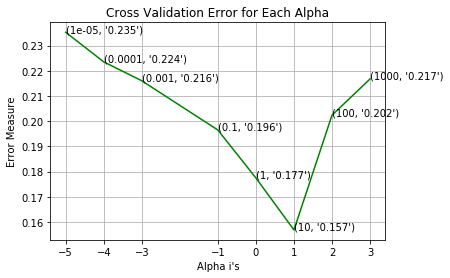

For values of best alpha = 10 The train log loss is: 0.06007204803192059
For values of best alpha = 10 The cross validation log loss is: 0.15684924972198958


In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import log_loss

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000]

cv_log_error_array = []

for i in alpha:
    print("For Alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_text_ohe, y_train)
    
    nb_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    nb_sig_clf.fit(train_text_ohe, y_train)
    
    sig_clf_probs = nb_sig_clf.predict_proba(cv_text_ohe)
    
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    #to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')

for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
    
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for Each Alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error Measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_text_ohe, y_train)

nb_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
nb_sig_clf.fit(train_text_ohe, y_train)

predict_y = nb_sig_clf.predict_proba(train_text_ohe)
print('For values of best alpha =', alpha[best_alpha],"The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = nb_sig_clf.predict_proba(cv_text_ohe)
print('For values of best alpha =', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

In [20]:
from sklearn.metrics import accuracy_score
predicted_y = nb_sig_clf.predict(cv_text_ohe)
train_accuracy = (nb_sig_clf.score(train_text_ohe, y_train)*100)
cv_accuracy = (accuracy_score(predicted_y, y_cv)*100)

print("Naive Bayes Train Accuracy -",train_accuracy)
print("Naive Bayes CV Accuracy -",cv_accuracy)

Naive Bayes Train Accuracy - 99.58053691275168
Naive Bayes CV Accuracy - 95.63758389261746


---------------------------------------- Confusion Matrix ----------------------------------------


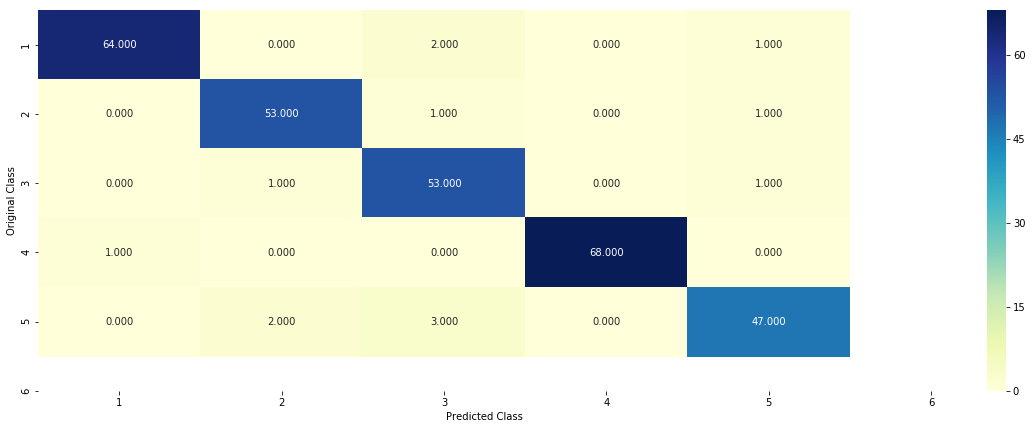

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


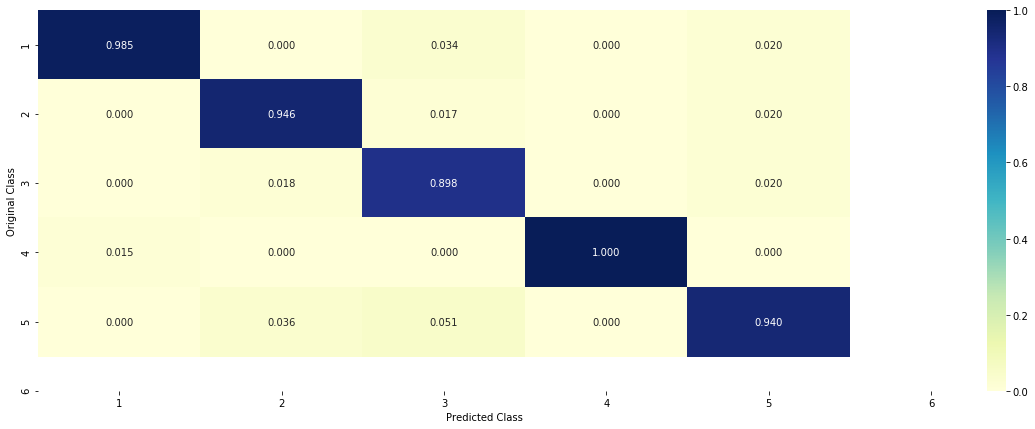

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


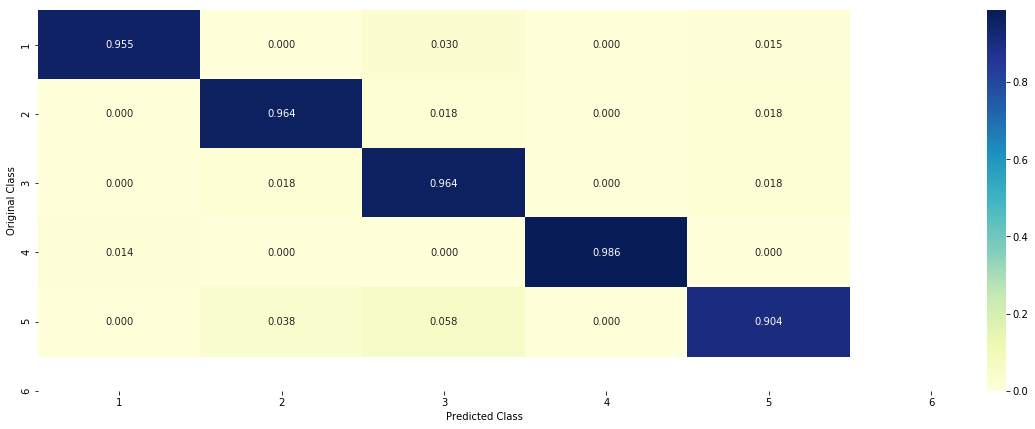

In [21]:
plot_confusion_matrix(y_cv, nb_sig_clf.predict(cv_text_ohe.toarray()))

In [22]:
from sklearn.metrics import classification_report
print(classification_report(predicted_y, y_cv, target_names=target_category))

               precision    recall  f1-score   support

     business       0.96      0.98      0.97        65
         tech       0.96      0.95      0.95        56
     politics       0.96      0.90      0.93        59
        sport       0.99      1.00      0.99        68
entertainment       0.90      0.94      0.92        50

     accuracy                           0.96       298
    macro avg       0.95      0.95      0.95       298
 weighted avg       0.96      0.96      0.96       298



**<h2><font color=red>2.</font><font color=green> Logistic Regression</font></h2>**

For values of alpha = 1e-05 The log loss is: 0.19875598201745154
For values of alpha = 0.0001 The log loss is: 0.13533043022752375
For values of alpha = 0.001 The log loss is: 0.13270837371091415
For values of alpha = 0.01 The log loss is: 0.13741844951721358
For values of alpha = 0.1 The log loss is: 0.16313037691957166
For values of alpha = 1 The log loss is: 0.2611508510134202


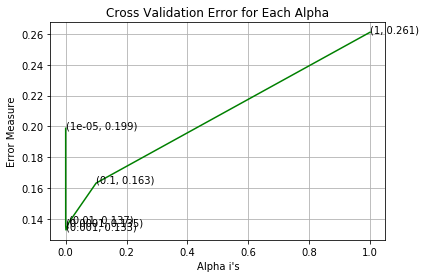

For values of best alpha = 0.001 The train log loss is: 0.034976459619623035
For values of best alpha = 0.001 The cross validation log loss is: 0.13270837371091415


In [23]:
from sklearn.linear_model import LogisticRegression

#train a logistic regression + calibration model using text features which are one-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42) #loss='log'_means_logistic_regression
    clf.fit(train_text_ohe, y_train)
    
    lr_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    lr_sig_clf.fit(train_text_ohe, y_train)
    
    predict_y = lr_sig_clf.predict_proba(cv_text_ohe)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    
    print('For values of alpha =',i,"The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
    
plt.grid()
plt.title("Cross Validation Error for Each Alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error Measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_ohe, y_train)

lr_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
lr_sig_clf.fit(train_text_ohe, y_train)

predict_y = lr_sig_clf.predict_proba(train_text_ohe)
print('For values of best alpha =', alpha[best_alpha],"The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = lr_sig_clf.predict_proba(cv_text_ohe)
print('For values of best alpha =', alpha[best_alpha],"The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

In [24]:
predicted_y = lr_sig_clf.predict(cv_text_ohe)
train_accuracy = (lr_sig_clf.score(train_text_ohe, y_train)*100)
cv_accuracy = (accuracy_score(predicted_y, y_cv)*100)

print("Logistic Regression Train Accuracy -",train_accuracy)
print("Logistic Regression CV Accuracy -",cv_accuracy)

Logistic Regression Train Accuracy - 100.0
Logistic Regression CV Accuracy - 96.64429530201343


---------------------------------------- Confusion Matrix ----------------------------------------


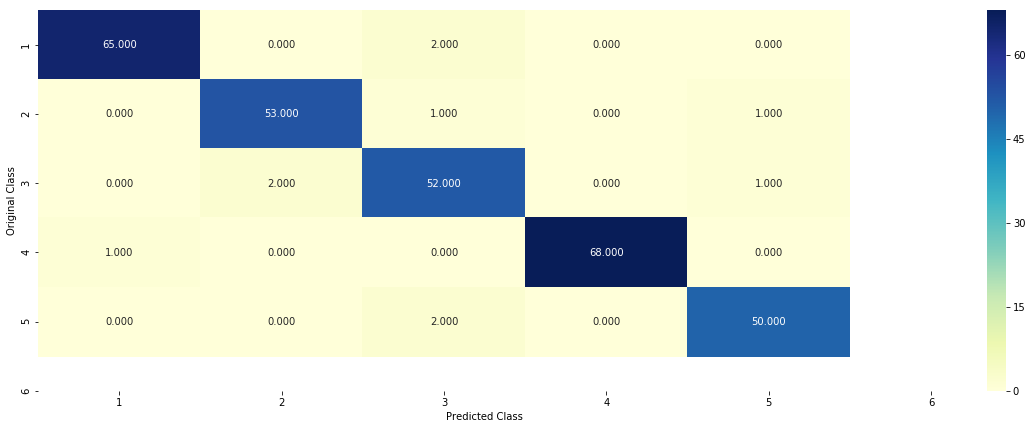

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


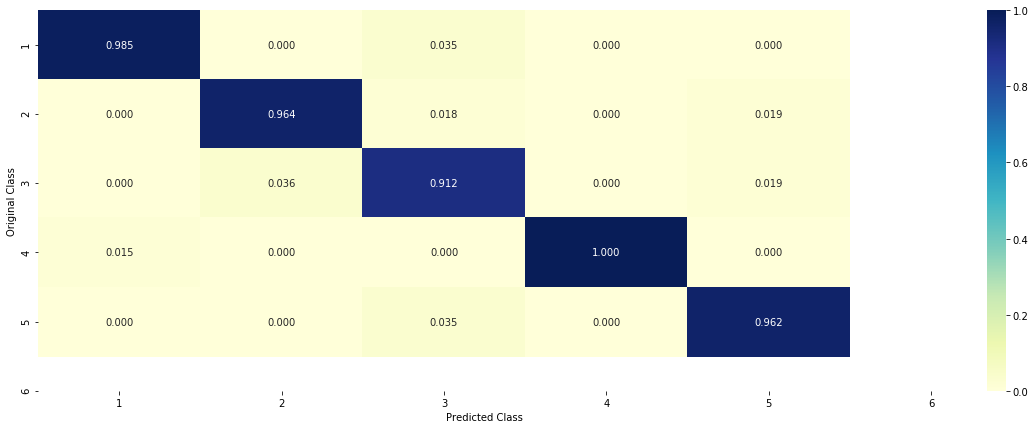

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


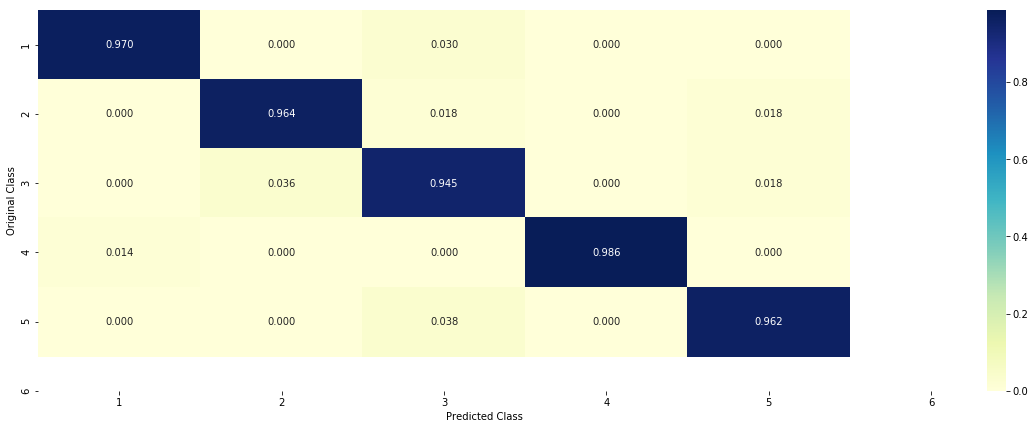

In [25]:
plot_confusion_matrix(y_cv, lr_sig_clf.predict(cv_text_ohe.toarray()))

In [26]:
print(classification_report(predicted_y, y_cv, target_names=target_category))

               precision    recall  f1-score   support

     business       0.97      0.98      0.98        66
         tech       0.96      0.96      0.96        55
     politics       0.95      0.91      0.93        57
        sport       0.99      1.00      0.99        68
entertainment       0.96      0.96      0.96        52

     accuracy                           0.97       298
    macro avg       0.97      0.96      0.96       298
 weighted avg       0.97      0.97      0.97       298



**<h2><font color=red>3.</font><font color=green> Random Forest Classifier</font></h2>**

for n_estimators = 100 and max depth = 5
Log Loss : 0.2812396143198068
for n_estimators = 100 and max depth = 10
Log Loss : 0.24088684961643603
for n_estimators = 200 and max depth = 5
Log Loss : 0.26348110507297856
for n_estimators = 200 and max depth = 10
Log Loss : 0.23488200639081425
for n_estimators = 500 and max depth = 5
Log Loss : 0.25484691780489677
for n_estimators = 500 and max depth = 10
Log Loss : 0.2318821306413611
for n_estimators = 1000 and max depth = 5
Log Loss : 0.25552311401425065
for n_estimators = 1000 and max depth = 10
Log Loss : 0.23303281334385575
for n_estimators = 2000 and max depth = 5
Log Loss : 0.25310368976425535
for n_estimators = 2000 and max depth = 10
Log Loss : 0.23175849210034435


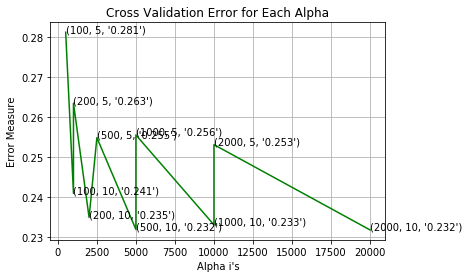

For values of best estimator = 2000 The train log loss is: 0.07168250490706175
For values of best estimator = 2000 The cross validation log loss is: 0.23175849210034435


In [27]:
from sklearn.ensemble import RandomForestClassifier

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]

cv_log_error_array = []

for i in alpha:
    for j in max_depth:
        print("for n_estimators =",i,"and max depth =",j)
        
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_text_ohe, y_train)
        
        rf_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        rf_sig_clf.fit(train_text_ohe, y_train)
        
        sig_clf_probs = rf_sig_clf.predict_proba(cv_text_ohe)
        
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')

for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
    
plt.grid()
plt.title("Cross Validation Error for Each Alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error Measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_text_ohe, y_train)

rf_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
rf_sig_clf.fit(train_text_ohe, y_train)

predict_y = rf_sig_clf.predict_proba(train_text_ohe)
print('For values of best estimator =', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = rf_sig_clf.predict_proba(cv_text_ohe)
print('For values of best estimator =', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

In [28]:
predicted_y = rf_sig_clf.predict(cv_text_ohe)
train_accuracy = (rf_sig_clf.score(train_text_ohe, y_train)*100)
cv_accuracy = (accuracy_score(predicted_y, y_cv)*100)

print("Random Forest Train Accuracy -",train_accuracy)
print("Random Forest CV Accuracy -",cv_accuracy)

Random Forest Train Accuracy - 99.49664429530202
Random Forest CV Accuracy - 92.9530201342282


---------------------------------------- Confusion Matrix ----------------------------------------


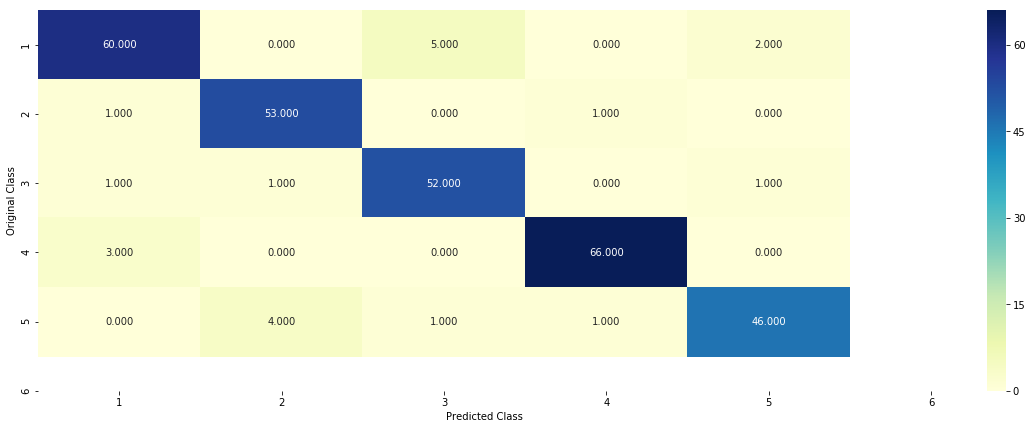

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


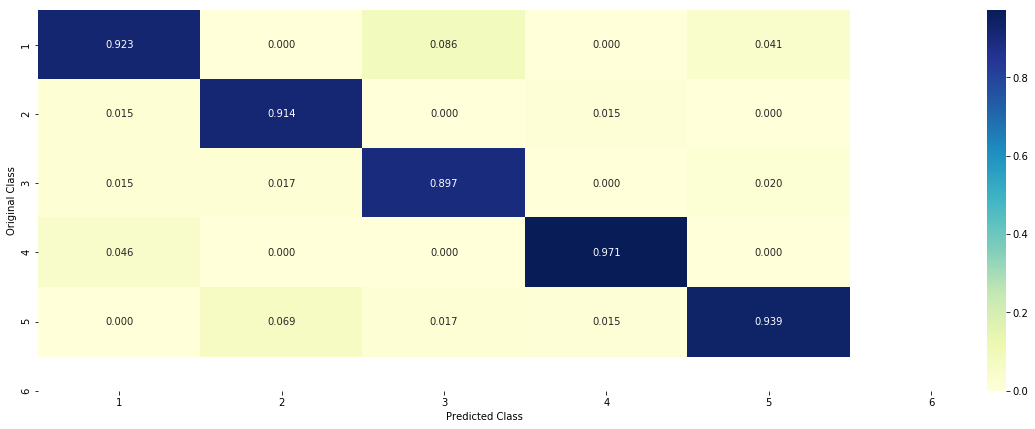

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


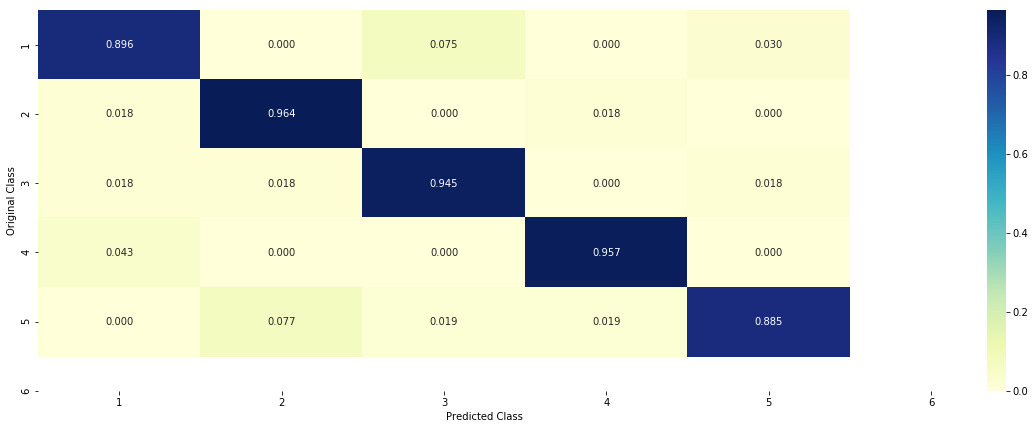

In [29]:
plot_confusion_matrix(y_cv, rf_sig_clf.predict(cv_text_ohe.toarray()))

In [30]:
print(classification_report(predicted_y, y_cv, target_names=target_category))

               precision    recall  f1-score   support

     business       0.90      0.92      0.91        65
         tech       0.96      0.91      0.94        58
     politics       0.95      0.90      0.92        58
        sport       0.96      0.97      0.96        68
entertainment       0.88      0.94      0.91        49

     accuracy                           0.93       298
    macro avg       0.93      0.93      0.93       298
 weighted avg       0.93      0.93      0.93       298



**<h2><font color=red>4.</font><font color=green> K Nearest Neighbor</font></h2>**

for alpha = 5
Log Loss : 1.0444689806114684
for alpha = 11
Log Loss : 0.8999366567689364
for alpha = 15
Log Loss : 0.8189553668955447
for alpha = 21
Log Loss : 0.762578603066164
for alpha = 31
Log Loss : 0.6882259186642607
for alpha = 41
Log Loss : 0.6305232565094372
for alpha = 51
Log Loss : 0.6311806236040777
for alpha = 99
Log Loss : 0.5310668198094399


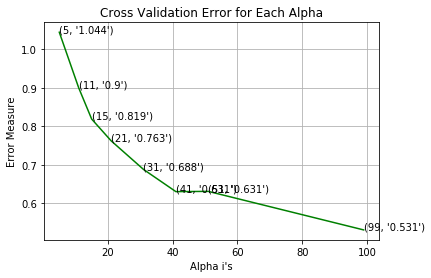

For values of best alpha = 99 The train log loss is: 0.452654519716482
For values of best alpha = 99 The cross validation log loss is: 0.5310668198094399


In [31]:
from sklearn.neighbors import KNeighborsClassifier

alpha = [5, 11, 15, 21, 31, 41, 51, 99]

cv_log_error_array = []

for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i) 
    clf.fit(train_text_ohe, y_train) #knn may not good at handling large dimensionality
    
    knn_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    knn_sig_clf.fit(train_text_ohe, y_train)
    
    sig_clf_probs = knn_sig_clf.predict_proba(cv_text_ohe)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    #to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for Each Alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error Measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_text_ohe, y_train)

knn_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
knn_sig_clf.fit(train_text_ohe, y_train)

predict_y = knn_sig_clf.predict_proba(train_text_ohe)
print('For values of best alpha =', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = knn_sig_clf.predict_proba(cv_text_ohe)
print('For values of best alpha =', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

In [32]:
predicted_y = knn_sig_clf.predict(cv_text_ohe)
train_accuracy = (knn_sig_clf.score(train_text_ohe, y_train)*100)
cv_accuracy = (accuracy_score(predicted_y, y_cv)*100)

print("K Nearest Neighbor Train Accuracy -",train_accuracy)
print("K Nearest Neighbor CV Accuracy -",cv_accuracy)

K Nearest Neighbor Train Accuracy - 93.45637583892618
K Nearest Neighbor CV Accuracy - 83.22147651006712


---------------------------------------- Confusion Matrix ----------------------------------------


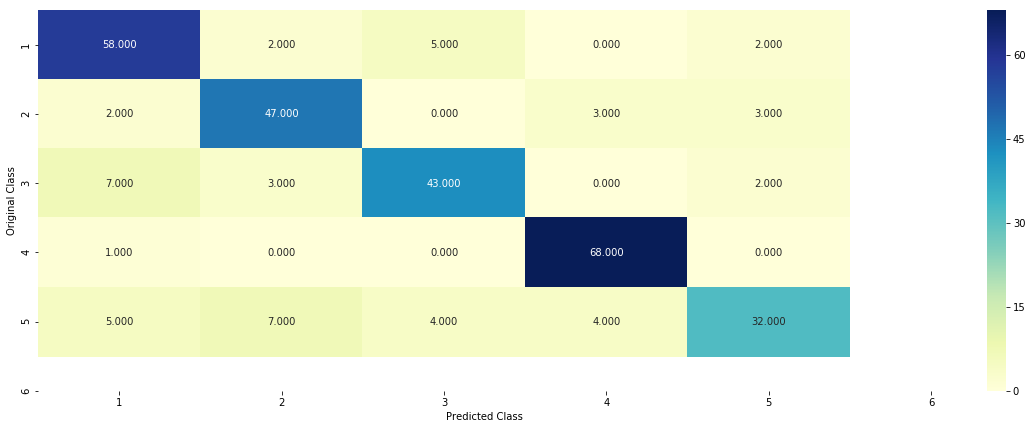

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


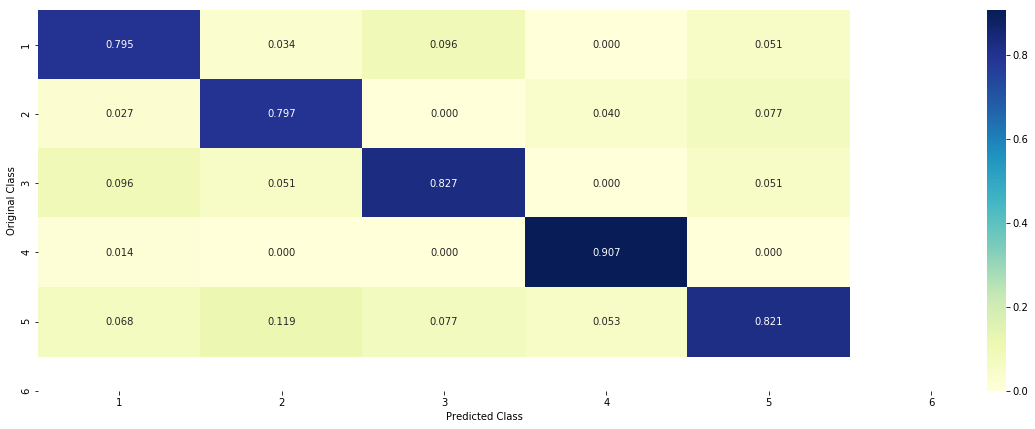

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


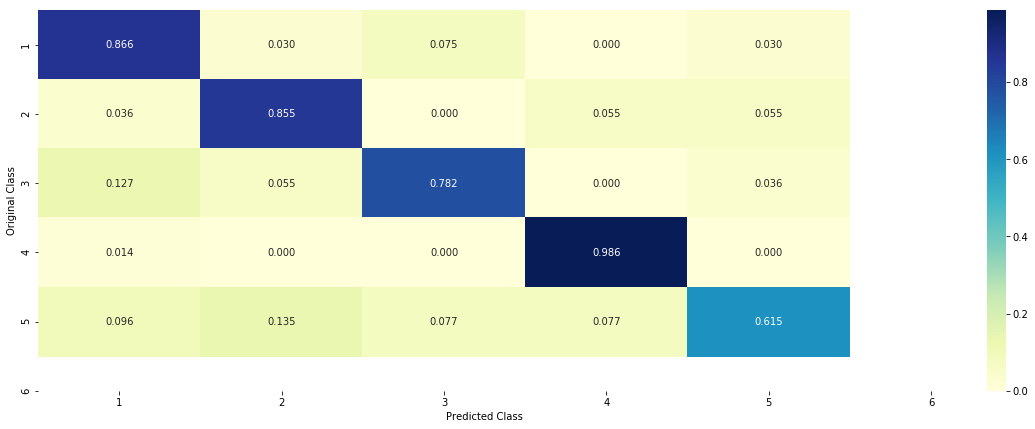

In [33]:
plot_confusion_matrix(y_cv, knn_sig_clf.predict(cv_text_ohe.toarray()))

In [34]:
print(classification_report(predicted_y, y_cv, target_names=target_category))

               precision    recall  f1-score   support

     business       0.87      0.79      0.83        73
         tech       0.85      0.80      0.82        59
     politics       0.78      0.83      0.80        52
        sport       0.99      0.91      0.94        75
entertainment       0.62      0.82      0.70        39

     accuracy                           0.83       298
    macro avg       0.82      0.83      0.82       298
 weighted avg       0.85      0.83      0.84       298



**<font color=red>Pretty Table</font>**

In [35]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Model", "Train Log-Loss", "CV Log-Loss", "Train Accuracy", "CV Accuracy"]
x.add_row(['Multinomial Naive Bayes', '0.060', '0.156', '99.58', '95.63'])
x.add_row(['Logistic Regression', '0.034', '0.132', '100.0', '96.64'])
x.add_row(['Random Forest', '0.071', '0.231', '99.49', '92.95'])
x.add_row(['K Nearest Neighbor', '0.452', '0.531', '93.45', '83.22'])
print(x)

+-------------------------+----------------+-------------+----------------+-------------+
|          Model          | Train Log-Loss | CV Log-Loss | Train Accuracy | CV Accuracy |
+-------------------------+----------------+-------------+----------------+-------------+
| Multinomial Naive Bayes |     0.060      |    0.156    |     99.58      |    95.63    |
|   Logistic Regression   |     0.034      |    0.132    |     100.0      |    96.64    |
|      Random Forest      |     0.071      |    0.231    |     99.49      |    92.95    |
|    K Nearest Neighbor   |     0.452      |    0.531    |     93.45      |    83.22    |
+-------------------------+----------------+-------------+----------------+-------------+


**From the above table it seems that, Logistic Regression Model works quite well as compared to other models as it has 96.64% CV (Test) accuracy. So we will apply Logistic Regression on given Testing dataset.**

<h3><font color=red>Test Set</font></h3>

In [36]:
test_data = pd.read_csv("D:/Case Studies/BBC News/BBC News Test.csv")
test_data.shape

(735, 2)

In [37]:
test_data.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [38]:
#checking null values
test_data.isna().sum()

ArticleId    0
Text         0
dtype: int64

**<font color=blue>Q. Is the text feature stable across Train and Test datasets ?</font>**

In [44]:
#to check text feature i.e., title stable across all the data sets (Train, Test)
len1,len2 = get_intersec_text(test_data)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data.")

86.64 % of word of test data appeared in train data.


**<font color=blue>Data Preprocessing</font>**

In [39]:
#test_data_text_processing_stage_
for index, row in test_data.iterrows():
    if type(row['Text']) is str:
        txt_preprocessing(row['Text'], index, 'Text', test_data)
    else:
        print("THERE IS NO TEXT DESCRIPTION FOR ID :",index)

test_data.head()

,ArticleId,Text
0,1018,qpr keeper day heads preston queens park range...
1,1319,software watching work software monitor every ...
2,1138,arcy injury adds ireland woe gordon arcy ruled...
3,459,india reliance family feud heats ongoing publi...
4,1020,boro suffer morrison injury blow middlesbrough...


**<font color=blue>One Hot Encoding of Text Data (BoW)</font>**

In [40]:
#we use the same vectorizer that was trained on train data
test_text_ohe = text_vectorizer.transform(test_data['Text'])

#don't forget to normalize every feature
test_text_ohe = normalize(test_text_ohe, axis=0)

**Use the same CalibratedClassifierCV which is used in Logistic Regression Model to predict the target (Category) of Test Set.**

In [45]:
#lr_sig_clf is the same CalibratedClassifierCV which is used in Logistic Regression Model
test_final_ohe = lr_sig_clf.predict(test_text_ohe)
test_final_list = test_final_ohe.tolist()

test_final_list[:5]

['sport', 'tech', 'sport', 'business', 'sport']

In [46]:
test_data['Category'] = test_final_list

test_data.head(20)

,ArticleId,Text,Category
0,1018,qpr keeper day heads preston queens park range...,sport
1,1319,software watching work software monitor every ...,tech
2,1138,arcy injury adds ireland woe gordon arcy ruled...,sport
3,459,india reliance family feud heats ongoing publi...,business
4,1020,boro suffer morrison injury blow middlesbrough...,sport
5,51,lewsey puzzle disallowed try england josh lews...,sport
6,2025,blair blasts tory spending plans tony blair la...,politics
7,1479,former ni minister scott dies former northern ...,politics
8,27,career honour actor dicaprio actor leonardo di...,entertainment
9,397,tsunami hit sri lanka banks sri lanka banks fa...,business


In [47]:
#save the final dataset
test_data.to_csv("final_test_set.csv")